In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *

# 定义模型和损失函数
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(1, 32)
        self.hidden2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        return self.output(x)

loss_fn = nn.MSELoss()

In [7]:
# 生成随机数据
np.random.seed(0)
n_samples = 1000
x = np.linspace(-5, 5, n_samples)
y = 0.3 * (x ** 2) + np.random.randn(n_samples)

# 转换为Tensor
x = torch.unsqueeze(torch.from_numpy(x).float(), 1)
y = torch.unsqueeze(torch.from_numpy(y).float(), 1)

# 将数据封装为数据集
dataset = torch.utils.data.TensorDataset(x, y)

names = ["Batch", "Stochastic", "Minibatch"]  # 批量梯度下降法、随机梯度下降法、小批量梯度下降法
batch_size = [n_samples, 1, 128]
momentum = [1, 0, 1]
losses = [[], [], []]

In [8]:
learning_rate = 0.0001
n_epochs = 1000

# 分别训练
for i in range(3):
    model = Model()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum[i])
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size[i], shuffle=True)
    for epoch in tqdm(range(n_epochs), desc=names[i], leave=True, unit=' epoch'):
        x, y = next(iter(dataloader))
        optimizer.zero_grad()
        out = model(x)
        loss = loss_fn(out, y)
        loss.backward()
        optimizer.step()
        losses[i].append(loss.item())

Minibatch: 100%|███████████████████████| 1000/1000 [00:01<00:00, 748.00 epoch/s]


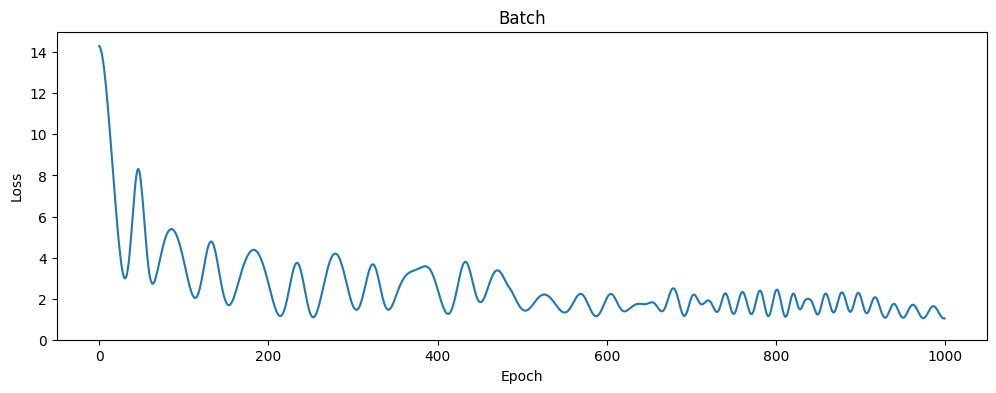

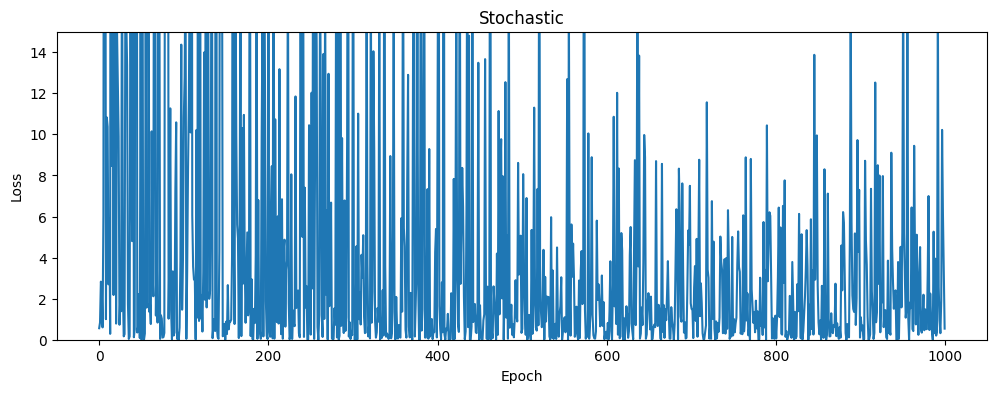

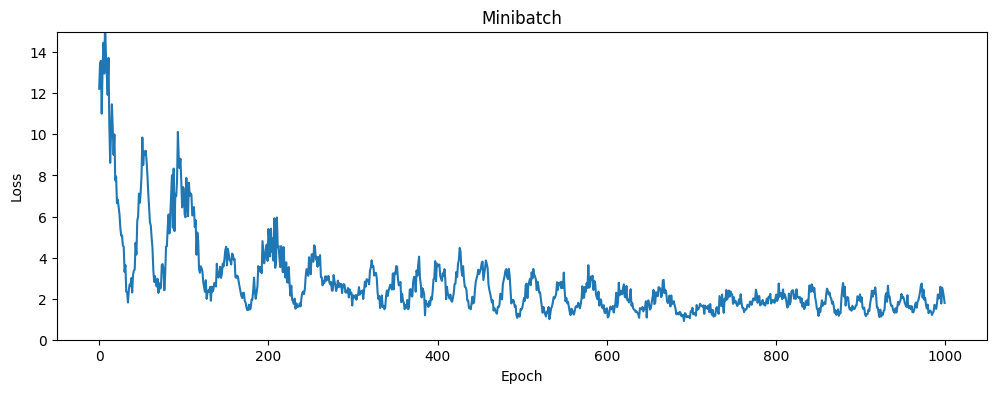

In [9]:
# 使用 Matplotlib 绘制损失值的变化趋势
for i, loss_list in enumerate(losses):
    plt.figure(figsize=(12, 4))
    plt.plot(loss_list)
    plt.ylim((0, 15))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(names[i])
    plt.show()